In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass#print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
tf.__version__

'2.12.0'

4422102/4422102 [==============================] - 0s 0us/step


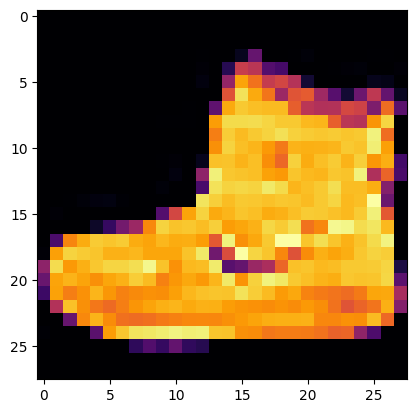

In [3]:
(train_X, train_y),(test_X, test_y) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_X[0],cmap="inferno")

In [4]:
train_X = train_X/255
test_X = test_X / 255

In [5]:
train_X.shape, train_y.shape

((60000, 28, 28), (60000,))

In [6]:
test_X.shape, test_y.shape

((10000, 28, 28), (10000,))

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(64,(3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]
)
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(train_X, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 1.3309 - accuracy: 0.5440
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.7051 - accuracy: 0.7372
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.6003 - accuracy: 0.7780
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.5445 - accuracy: 0.7999
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.5056 - accuracy: 0.8147
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4760 - accuracy: 0.8251
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.4485 - accuracy: 0.8356
Epoch 8/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.4286 - accuracy: 0.8429
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.4112 - accuracy: 0.8491
Epoch 10/10
1875/1875 [==============================] - 52s 27m

In [8]:
layer_outputs = [layer.output for layer in model.layers]

In [9]:
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [10]:
f1 = activation_model.predict(test_X[0].reshape(1,28,28,1))[0]
f2 = activation_model.predict(test_X[23].reshape(1,28,28,1))[0]

1/1 [==============================] - 0s 24ms/step


In [11]:
f1.shape

(1, 26, 26, 64)

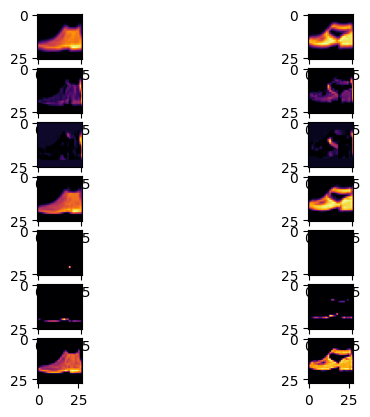

In [12]:

f, axarr = plt.subplots(7,2)
axarr[0,0].imshow(f1[0,:,:, 0],cmap="inferno") # ouput of 1st filter
axarr[0,0].grid(False)
axarr[1,0].imshow(f1[0,:,:, 9],cmap="inferno") # output of 10th filter
axarr[1,0].grid(False)
axarr[2,0].imshow(f1[0,:,:, 19],cmap="inferno") # output of 20th filter
axarr[2,0].grid(False)
axarr[3,0].imshow(f1[0,:,:, 29],cmap="inferno") # output of 30th filter
axarr[3,0].grid(False)
axarr[4,0].imshow(f1[0,:,:, 39],cmap="inferno") # output of 40th filter
axarr[4,0].grid(False)
axarr[5,0].imshow(f1[0,:,:, 49],cmap="inferno") # output of 50th filter
axarr[5,0].grid(False)

axarr[6,0].imshow(test_X[0],cmap="inferno") # output of 50th filter
axarr[6,0].grid(False)

axarr[0,1].imshow(f2[0,:,:, 0],cmap="inferno") # ouput of 1st filter
axarr[0,1].grid(False)
axarr[1,1].imshow(f2[0,:,:, 9],cmap="inferno") # output of 10th filter
axarr[1,1].grid(False)
axarr[2,1].imshow(f2[0,:,:, 19],cmap="inferno") # output of 20th filter
axarr[2,1].grid(False)
axarr[3,1].imshow(f2[0,:,:, 29],cmap="inferno") # output of 30th filter
axarr[3,1].grid(False)
axarr[4,1].imshow(f2[0,:,:, 39],cmap="inferno") # output of 40th filter
axarr[4,1].grid(False)
axarr[5,1].imshow(f2[0,:,:, 49],cmap="inferno") # output of 50th filter
axarr[5,1].grid(False)

axarr[6,1].imshow(test_X[23],cmap="inferno") # output of 50th filter
axarr[6,1].grid(False)

In [13]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory("/kaggle/input/horses-or-humans-dataset/horse-or-human/train",
                                 target_size=(300,300),batch_size=128, 
                                 class_mode="binary")
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory("/kaggle/input/horses-or-humans-dataset/horse-or-human/validation",
                                      target_size=(300,300), batch_size=32,
                                      class_mode="binary")

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [14]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 151s 18s/step - loss: 1.5965 - accuracy: 0.4872 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 148s 18s/step - loss: 0.6897 - accuracy: 0.5150 - val_loss: 0.6848 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 147s 18s/step - loss: 0.6695 - accuracy: 0.5829 - val_loss: 0.6135 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 147s 18s/step - loss: 0.8305 - accuracy: 0.6819 - val_loss: 0.6898 - val_accuracy: 0.5586
Epoch 5/15
8/8 [==============================] - 146s 18s/step - loss: 0.6457 - accuracy: 0.5640 - val_loss: 0.5137 - val_accuracy: 0.7852
Epoch 6/15
8/8 [==============================] - 146s 18s/step - loss: 0.6711 - accuracy: 0.7731 - val_loss: 0.6620 - val_accuracy: 0.5625
Epoch 7/15
8/8 [==============================] - 147s 18s/step - loss: 0.6529 - accuracy: 0.7408 - val_loss: 0.4608 - val_accuracy: 0.8555
Epoch 8/15
8/8 [====

In [16]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img("/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/horses/horse1-000.png", target_size=(300, 300))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images1 = np.vstack([x])
f1 = activation_model.predict(images1)

img = load_img("/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-00.png", target_size=(300, 300))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images2 = np.vstack([x])
f2 = activation_model.predict(images2)

1/1 [==============================] - 0s 61ms/step


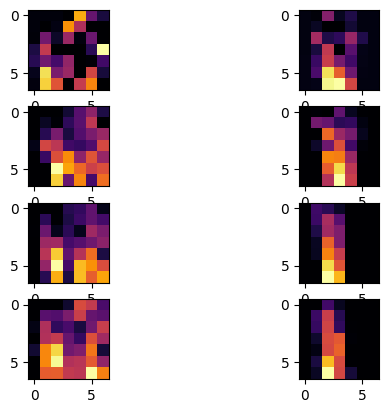

In [17]:
f, axarr = plt.subplots(4,2)
layer = 9
axarr[0,0].imshow(f1[layer][0,:,:, 0],cmap="inferno") # ouput of 1st filter
axarr[0,0].grid(False)
axarr[0,1].imshow(f2[layer][0,:,:, 0],cmap="inferno") # ouput of 1st filter
axarr[0,1].grid(False)
axarr[1,0].imshow(f1[layer][0,:,:, 14],cmap="inferno") # ouput of 1st filter
axarr[1,0].grid(False)
axarr[1,1].imshow(f2[layer][0,:,:, 14],cmap="inferno") # ouput of 1st filter
axarr[1,1].grid(False)
axarr[2,0].imshow(f1[layer][0,:,:, 29],cmap="inferno") # ouput of 1st filter
axarr[2,0].grid(False)
axarr[2,1].imshow(f2[layer][0,:,:, 29],cmap="inferno") # ouput of 1st filter
axarr[2,1].grid(False)
axarr[2,0].imshow(f1[layer][0,:,:, 44],cmap="inferno") # ouput of 1st filter
axarr[2,0].grid(False)
axarr[2,1].imshow(f2[layer][0,:,:, 44],cmap="inferno") # ouput of 1st filter
axarr[2,1].grid(False)
axarr[3,0].imshow(f1[layer][0,:,:, 59],cmap="inferno") # ouput of 1st filter
axarr[3,0].grid(False)
axarr[3,1].imshow(f2[layer][0,:,:, 59],cmap="inferno") # ouput of 1st filter
axarr[3,1].grid(False)